#### Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib
import pickle

#### Reading & Cleaning the Data

In [175]:
data = pd.read_csv('./data/triage_classification.csv')
data['gender'] = pd.Series(['M' if val==1 else 'F' for val in data['gender']])
data.rename(columns= {'Unnamed: 0' : 'ID'}, inplace=True)
data['ID'] = pd.Series([val+1 for val in range(len(data['ID']))])
data['exercise angina'] = pd.Series(['Yes' if val==1 else 'No' for val in data['exercise angina']])
data['hypertension'] = pd.Series(['Yes' if val==1 else 'No' for val in data['hypertension']])
data['heart_disease'] = pd.Series(['Yes' if val==1 else 'No' for val in data['heart_disease']])
data['chest pain type'] = pd.Series([str(int(val)) for val in data['chest pain type']])
data = data.drop('ID', axis=1)

#### Preparing Data for Learning

In [176]:
df = data.copy()
y = df.pop('triage')
X = pd.get_dummies(df)
X.head()

,age,blood pressure,cholesterol,max heart rate,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,gender_F,...,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40.0,140.0,294.0,172.0,110.0,44.0,105.0,22.0,0.467386,0,...,1,0,1,0,0,1,0,0,1,0
1,49.0,160.0,180.0,156.0,107.0,40.0,115.0,18.0,0.467386,1,...,1,0,1,0,0,1,0,0,1,0
2,37.0,130.0,294.0,156.0,95.0,25.0,131.0,18.0,0.467386,0,...,1,0,1,0,0,1,0,0,1,0
3,48.0,138.0,214.0,156.0,114.0,88.0,139.0,21.0,0.467386,1,...,1,0,1,0,0,1,0,0,1,0
4,54.0,150.0,195.0,156.0,86.0,39.0,104.0,18.0,0.467386,0,...,1,0,1,0,0,1,0,0,1,0


#### Oversampling Unbalanced Classes

In [177]:
val_X = X.copy()
val_Y = y.copy()

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)


In [153]:
X.shape
print(val_Y.value_counts())
print(y.value_counts())

yellow    5631
green      440
blue       422
orange     339
red        129
Name: triage, dtype: int64
yellow    5631
orange    5631
red       5631
blue      5631
green     5631
Name: triage, dtype: int64


#### Creating Train-Test-Validation Splits

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

_, x_val, _, y_val = train_test_split(val_X, val_Y, test_size=len(val_Y)-1, random_state=0)


In [179]:
print(X_train.shape)
print(x_val.shape,y_val.shape)

(25339, 28)
(6960, 28) (6960,)


In [180]:
x_val.head()

,age,blood pressure,cholesterol,max heart rate,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,gender_F,...,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3162,80.0,98.0,167.0,183.0,63.37,57.0,124.0,26.5,0.467386,1,...,1,0,1,0,0,1,0,0,1,0
2355,57.0,135.0,192.0,182.0,118.70,31.0,92.0,33.2,0.467386,0,...,1,0,1,0,0,1,1,0,0,0
5199,80.0,109.0,195.0,138.0,79.25,96.0,132.0,23.6,0.467386,1,...,1,0,1,0,0,1,1,0,0,0
2265,64.0,114.0,193.0,150.0,147.48,80.0,103.0,40.5,0.467386,1,...,1,0,1,0,0,1,1,0,0,0
5887,59.0,139.0,198.0,141.0,82.14,50.0,137.0,35.6,0.467386,1,...,1,0,1,0,0,1,0,0,0,1


#### Scaling the Data

In [156]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x_val = sc.transform(x_val)

In [157]:
X_train.shape

(25339, 28)

In [181]:
x_val.head()

,age,blood pressure,cholesterol,max heart rate,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,gender_F,...,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3162,80.0,98.0,167.0,183.0,63.37,57.0,124.0,26.5,0.467386,1,...,1,0,1,0,0,1,0,0,1,0
2355,57.0,135.0,192.0,182.0,118.70,31.0,92.0,33.2,0.467386,0,...,1,0,1,0,0,1,1,0,0,0
5199,80.0,109.0,195.0,138.0,79.25,96.0,132.0,23.6,0.467386,1,...,1,0,1,0,0,1,1,0,0,0
2265,64.0,114.0,193.0,150.0,147.48,80.0,103.0,40.5,0.467386,1,...,1,0,1,0,0,1,1,0,0,0
5887,59.0,139.0,198.0,141.0,82.14,50.0,137.0,35.6,0.467386,1,...,1,0,1,0,0,1,0,0,0,1


In [186]:
x_val.loc[[1]].to_csv('./out/valset.csv')

#### Training a Random Forest Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_val)

#### Evaluating Classifier Performance

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[ 422    0    0    0    0]
 [   0  439    0    0    0]
 [   0    0  339    0    0]
 [   0    0    0  129    0]
 [   0    0    0    0 5631]]
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       422
       green       1.00      1.00      1.00       439
      orange       1.00      1.00      1.00       339
         red       1.00      1.00      1.00       129
      yellow       1.00      1.00      1.00      5631

    accuracy                           1.00      6960
   macro avg       1.00      1.00      1.00      6960
weighted avg       1.00      1.00      1.00      6960

1.0


In [160]:
joblib.dump(classifier, './out/model.joblib')
joblib.dump(sc, './out/scale.joblib')

['./out/scale.joblib']

### Analyzing Feature Importances

[0, 1, 2, 4, 7, 11, 15, 26]

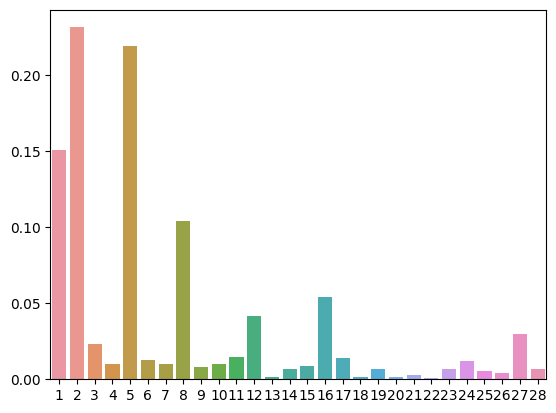

In [161]:
feat_rank = classifier.feature_importances_
sns.barplot(x = [i+1 for i in range(len(feat_rank))], y = feat_rank)

useful = [i for i,x in enumerate(feat_rank) if x>0.02]
useful

### Retraining with Most Important Features

#### Selecting the Features

In [162]:
df = data.copy()
y = df.pop('triage')
X = pd.get_dummies(df)

X = X.iloc[:,useful]
X.head()

,age,blood pressure,cholesterol,plasma glucose,bmi,chest pain type_0,chest pain type_4,smoking_status_never smoked
0,40.0,140.0,294.0,110.0,22.0,0,0,1
1,49.0,160.0,180.0,107.0,18.0,0,0,1
2,37.0,130.0,294.0,95.0,18.0,0,0,1
3,48.0,138.0,214.0,114.0,21.0,0,1,1
4,54.0,150.0,195.0,86.0,18.0,0,0,1


#### Balancing the Samples

In [163]:
val_X = X.copy()
val_Y = y.copy()

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)



#### Creating Test-Train-Validation Split

In [164]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

_, x_val, _, y_val = train_test_split(val_X, val_Y, test_size=len(val_Y)-1, random_state=0)



#### Scaling the Data

In [165]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x_val = sc.transform(x_val)



#### Training A Random Forest Classifier

In [166]:

classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_val)



#### Evaluating Classifier Performance 

In [167]:

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[ 422    0    0    0    0]
 [   0  439    0    0    0]
 [   0    0  339    0    0]
 [   0    0    0  129    0]
 [   2    0    6    0 5623]]
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       422
       green       1.00      1.00      1.00       439
      orange       0.98      1.00      0.99       339
         red       1.00      1.00      1.00       129
      yellow       1.00      1.00      1.00      5631

    accuracy                           1.00      6960
   macro avg       1.00      1.00      1.00      6960
weighted avg       1.00      1.00      1.00      6960

0.9988505747126437
